In [ ]:
#all of the pip installs you will need
!pip install openpyxl xlrd

In [101]:
import numpy as np
import sklearn as sk
import polars as pl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.colorbar as colorbar
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import pandas as pd
import math
import seaborn as sns


In [72]:
#Initializes the file path to the excel file
file_path = "/Users/carson/Downloads/Stock Data No CapIQ.xlsx"
# Read the Excel file with pandas
df = pd.read_excel(file_path, header=0, engine='openpyxl', sheet_name='Expanded Data')
summary = df.describe()
print(summary)

     Company Name    Ticker Period Ending Month and Year Corresponding Date  \
0      3M Company  NYSE:MMM       FQ42023        Dec2023         2023-12-31   
1      3M Company  NYSE:MMM       FQ32023        Sep2023         2023-09-30   
2      3M Company  NYSE:MMM       FQ22023        Jun2023         2023-06-30   
3      3M Company  NYSE:MMM       FQ12023        Mar2023         2023-03-31   
4      3M Company  NYSE:MMM       FQ42022        Dec2022         2022-12-31   
...           ...       ...           ...            ...                ...   
9973  Zoetis Inc.  NYSE:ZTS       FQ12020        Mar2020         2020-03-31   
9974  Zoetis Inc.  NYSE:ZTS       FQ42019        Dec2019         2019-12-31   
9975  Zoetis Inc.  NYSE:ZTS       FQ32019        Sep2019         2019-09-30   
9976  Zoetis Inc.  NYSE:ZTS       FQ22019        Jun2019         2019-06-30   
9977  Zoetis Inc.  NYSE:ZTS       FQ12019        Mar2019         2019-03-31   

     Last Sale Price  Revenue ($M)  Gross Profit Ma

In [74]:
#Describing all of the data in the excel file
print(df.describe())

#Printing the first 5 rows of the data
print(df.head())
#Printing the last 5 rows of the data
print(df.tail())
#Printing the shape of the data
print(df.shape)
#Printing the columns of the data
print(df.columns)
#Printing the data types of the data
print(df.dtypes)

                  Corresponding Date   Revenue ($M)  Gross Profit Margin  \
count                           9947    9978.000000          9978.000000   
mean   2021-07-06 11:12:35.323212800    6881.324903             0.429025   
min              2018-04-29 00:00:00   -3255.788000            -2.728851   
25%              2020-03-31 00:00:00    1240.175000             0.269439   
50%              2021-06-30 00:00:00    2743.056000             0.421215   
75%              2022-09-30 00:00:00    5905.000000             0.598434   
max              2023-12-31 00:00:00  169961.000000             3.018172   
std                              NaN   13679.701370             0.252276   

        EBITDA ($M)  EBITDA Margin  Net Income ($M)  \
count   9978.000000    9978.000000      9978.000000   
mean    1260.007129       0.184873       717.214871   
min   -59740.000000      -2.897435    -49746.000000   
25%      243.220500       0.092900       113.964750   
50%      533.158000       0.178226      

In [91]:
#Setting up the Year column 
df['Year'] = df['Corresponding Date'].dt.year

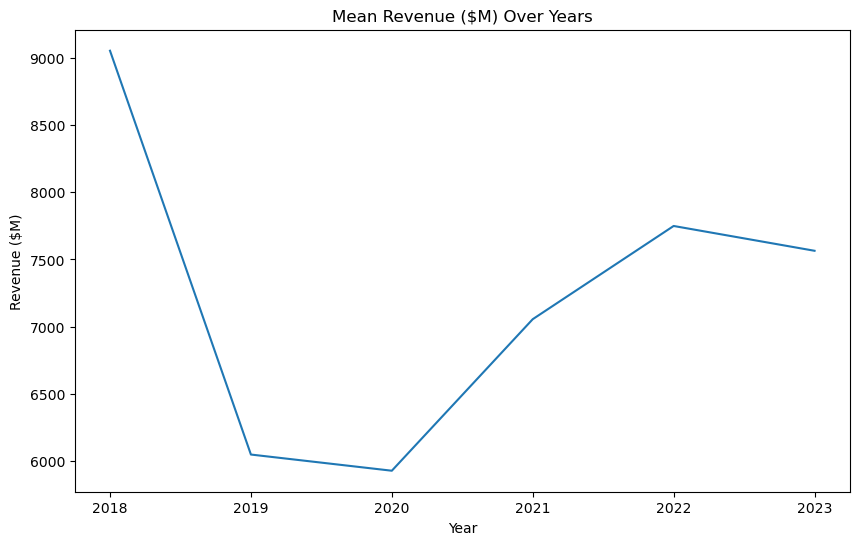

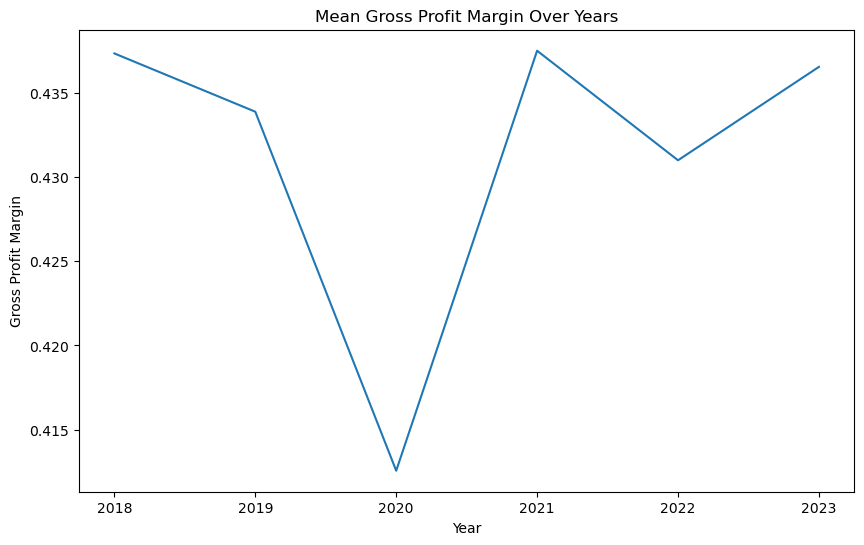

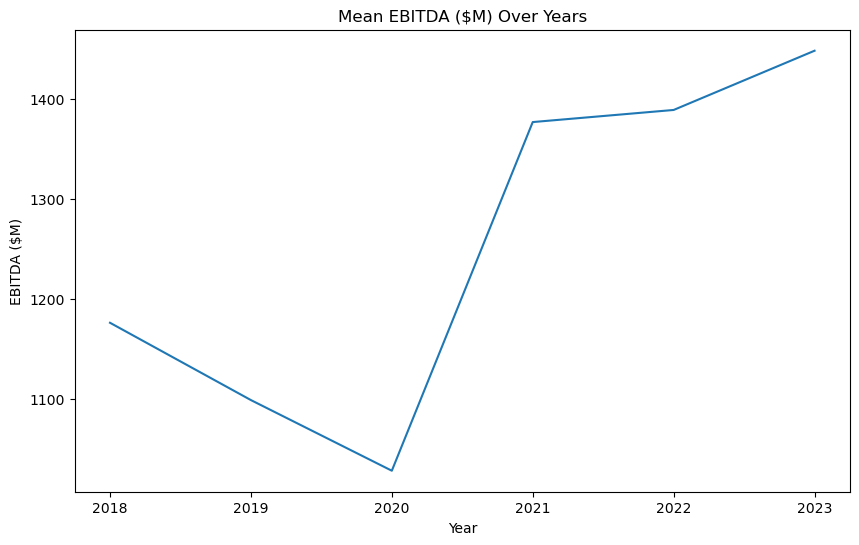

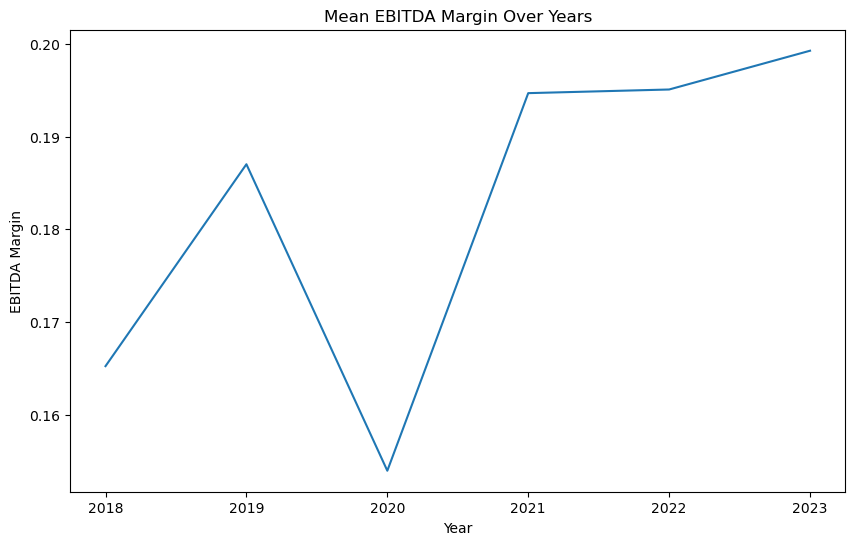

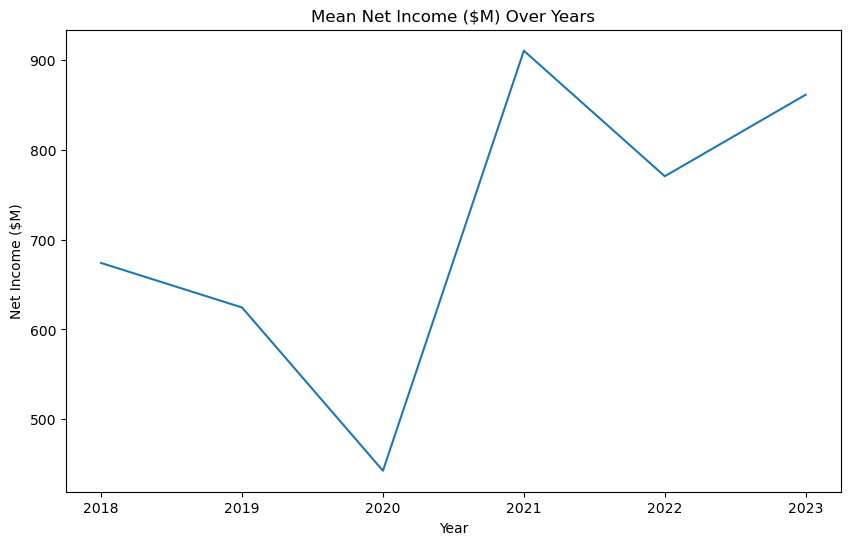

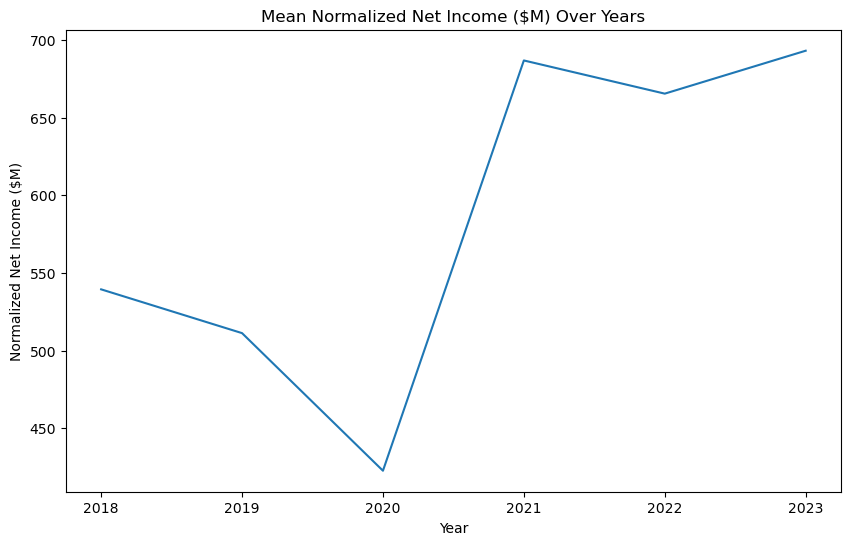

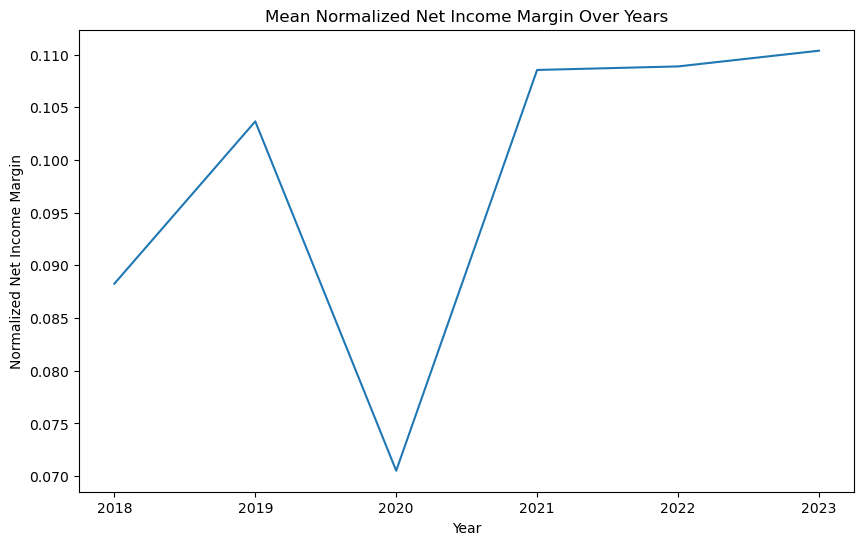

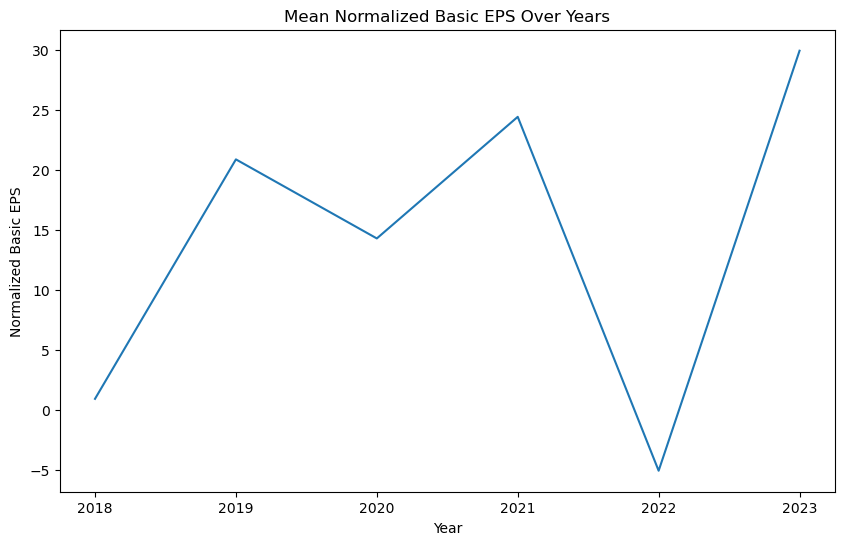

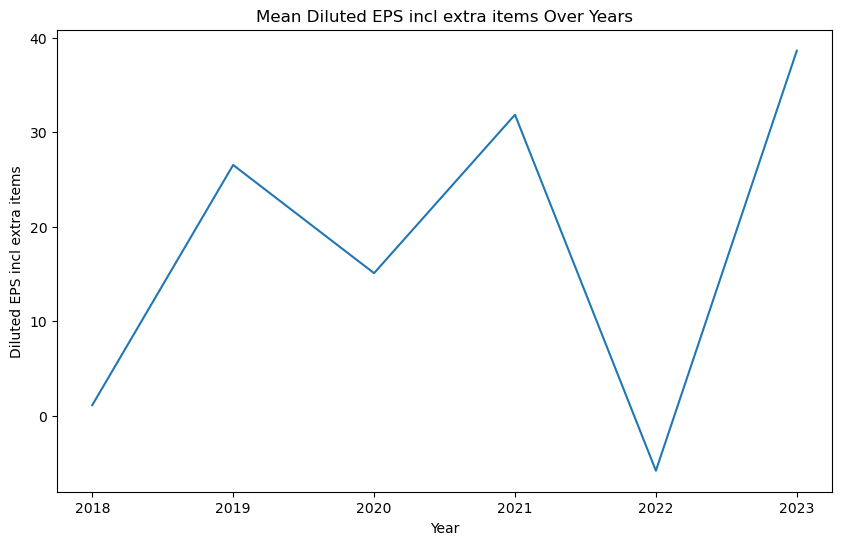

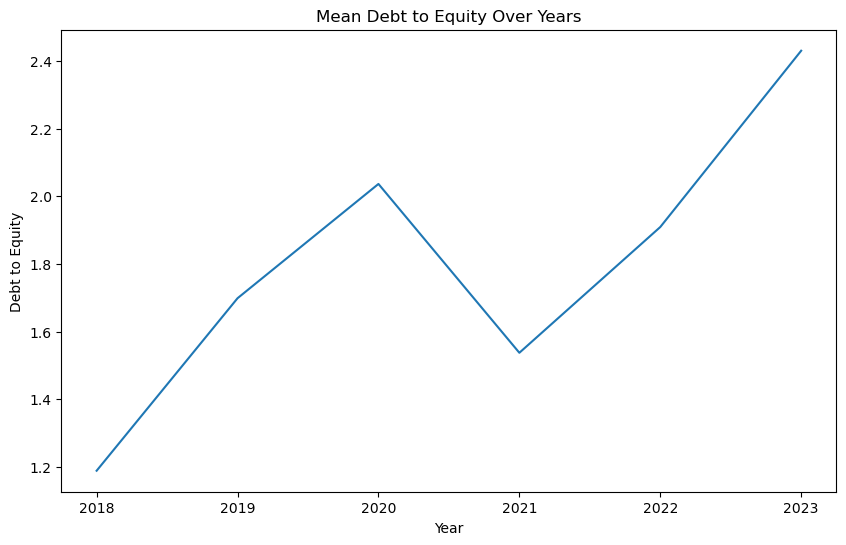

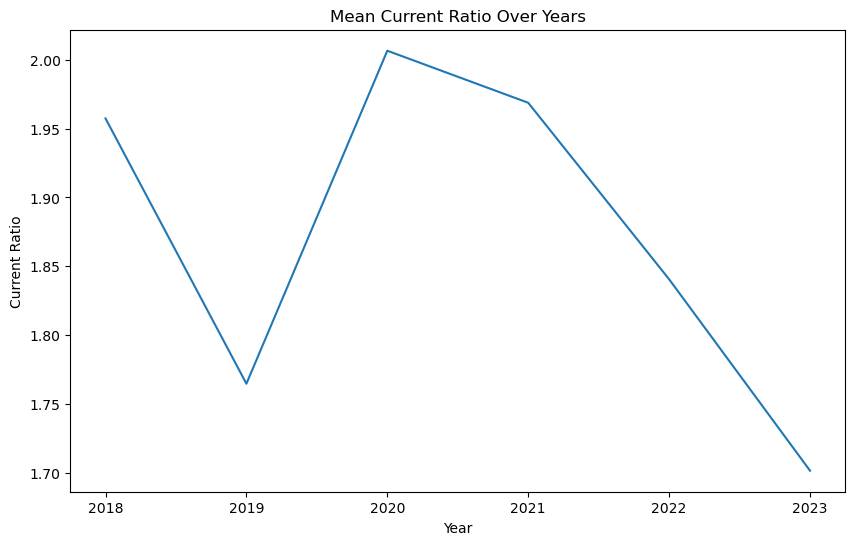

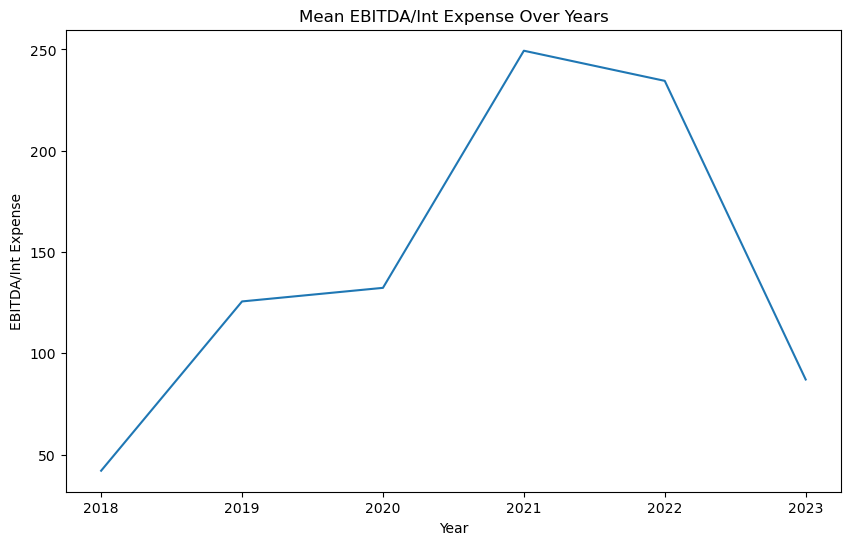

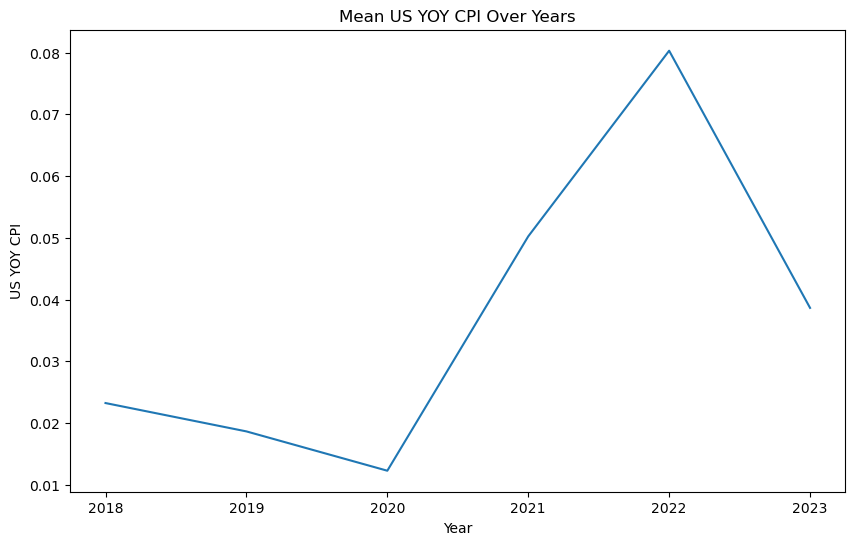

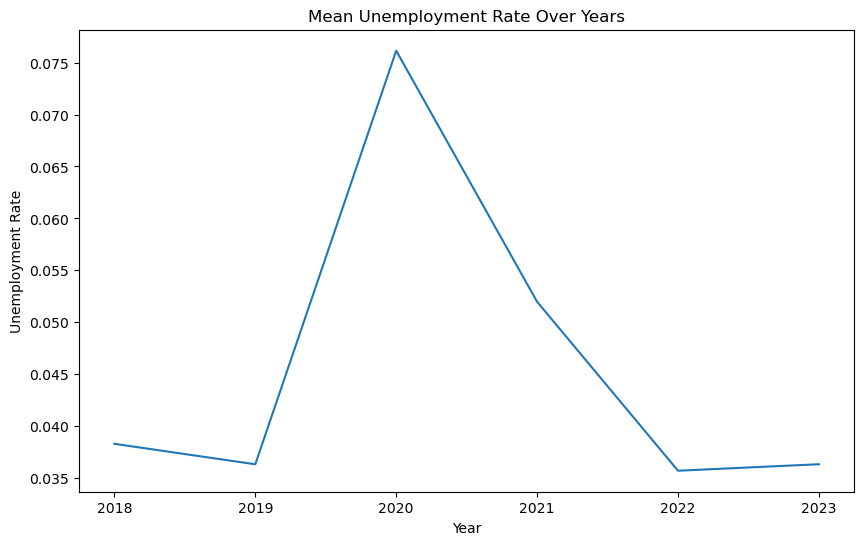

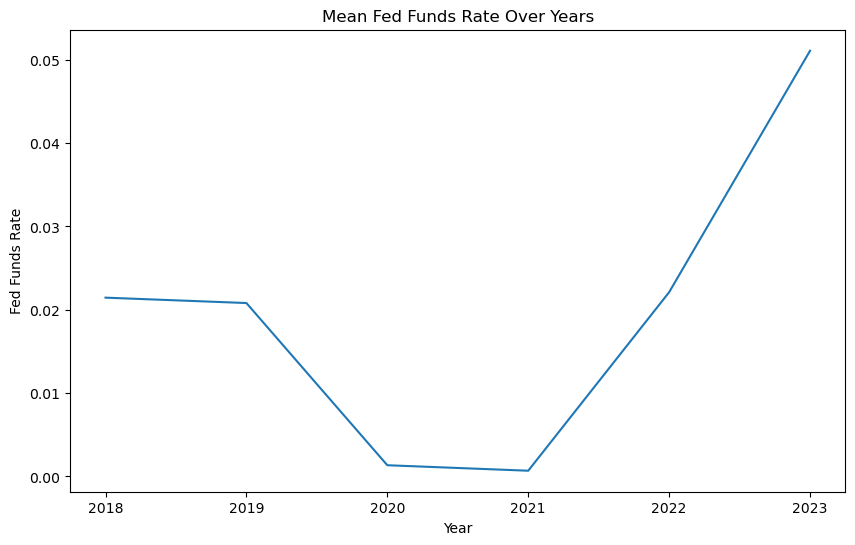

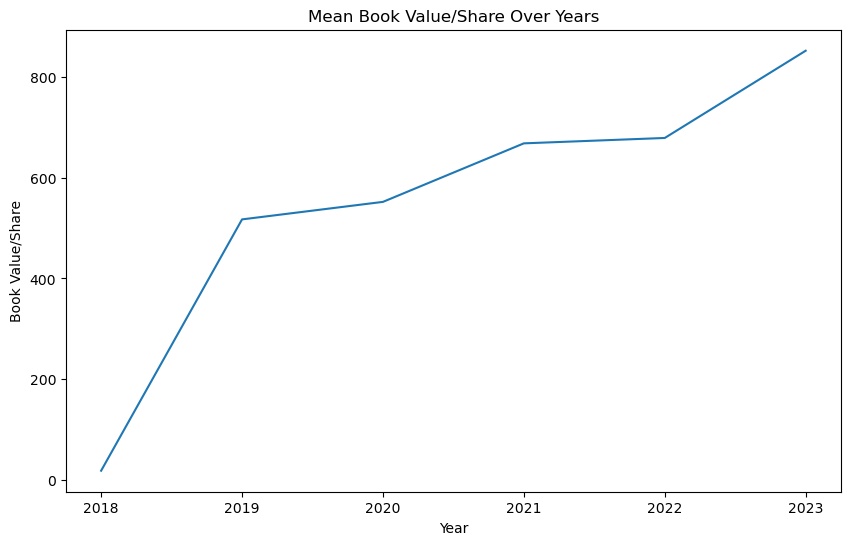

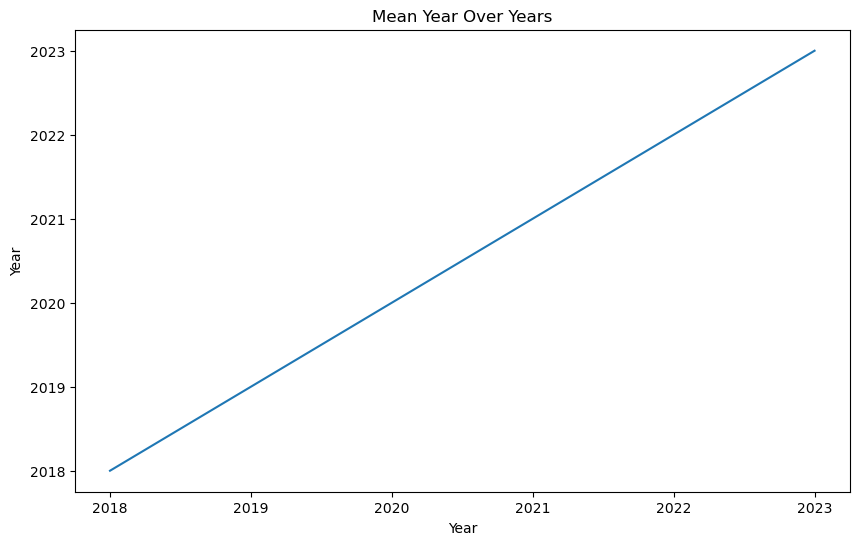

In [98]:
# Make sure plots are displayed in Jupyter notebook
%matplotlib inline

# Extract the year from the 'Corresponding Date' column
df['Year'] = df['Corresponding Date'].dt.year

# Get the float64 columns
float64_columns = df.select_dtypes(include=['float64']).columns

# Check if there are any float64 columns
if not float64_columns.empty:
    # Create a separate plot for each float64 column
    for column in float64_columns:
        plt.figure(figsize=(10, 6))
        df.groupby('Year')[column].mean().plot(kind='line')
        plt.title(f'Mean {column} Over Years')
        plt.ylabel(column)
        plt.show()
else:
    print("No float64 columns found in the DataFrame.")

In [106]:
# Group the data by company
grouped = df.groupby('Company Name')

# Determine the number of rows and columns for the subplots
num_companies = len(grouped)
num_cols = 3  # Adjust the number as needed
num_rows = num_companies // num_cols + (num_companies % num_cols > 0)

# Calculate the number of companies for each figure
num_companies_fig1 = num_companies // 2
num_companies_fig2 = num_companies - num_companies_fig1

# Create the first figure
fig1, axs1 = plt.subplots(num_rows, num_cols, figsize=(15, num_rows*5))  # Adjust the size as needed
axs1 = axs1.flatten()
for ax, (name, group) in zip(axs1, grouped):
    if num_companies_fig1 <= 0:
        break
    group.plot(x='Year', y='Revenue ($M)', ax=ax, title=name)
    num_companies_fig1 -= 1
for ax in axs1[num_companies_fig1:]:
    ax.remove()
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust the spacing as needed
plt.show()

# Create the second figure
fig2, axs2 = plt.subplots(num_rows, num_cols, figsize=(15, num_rows*5))  # Adjust the size as needed
axs2 = axs2.flatten()
for ax, (name, group) in zip(axs2, grouped):
    if num_companies_fig2 <= 0:
        break
    group.plot(x='Year', y='Revenue ($M)', ax=ax, title=name)
    num_companies_fig2 -= 1
for ax in axs2[num_companies_fig2:]:
    ax.remove()
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust the spacing as needed
plt.show()

<Figure size 1500x83500 with 0 Axes>

<Figure size 1500x83500 with 0 Axes>

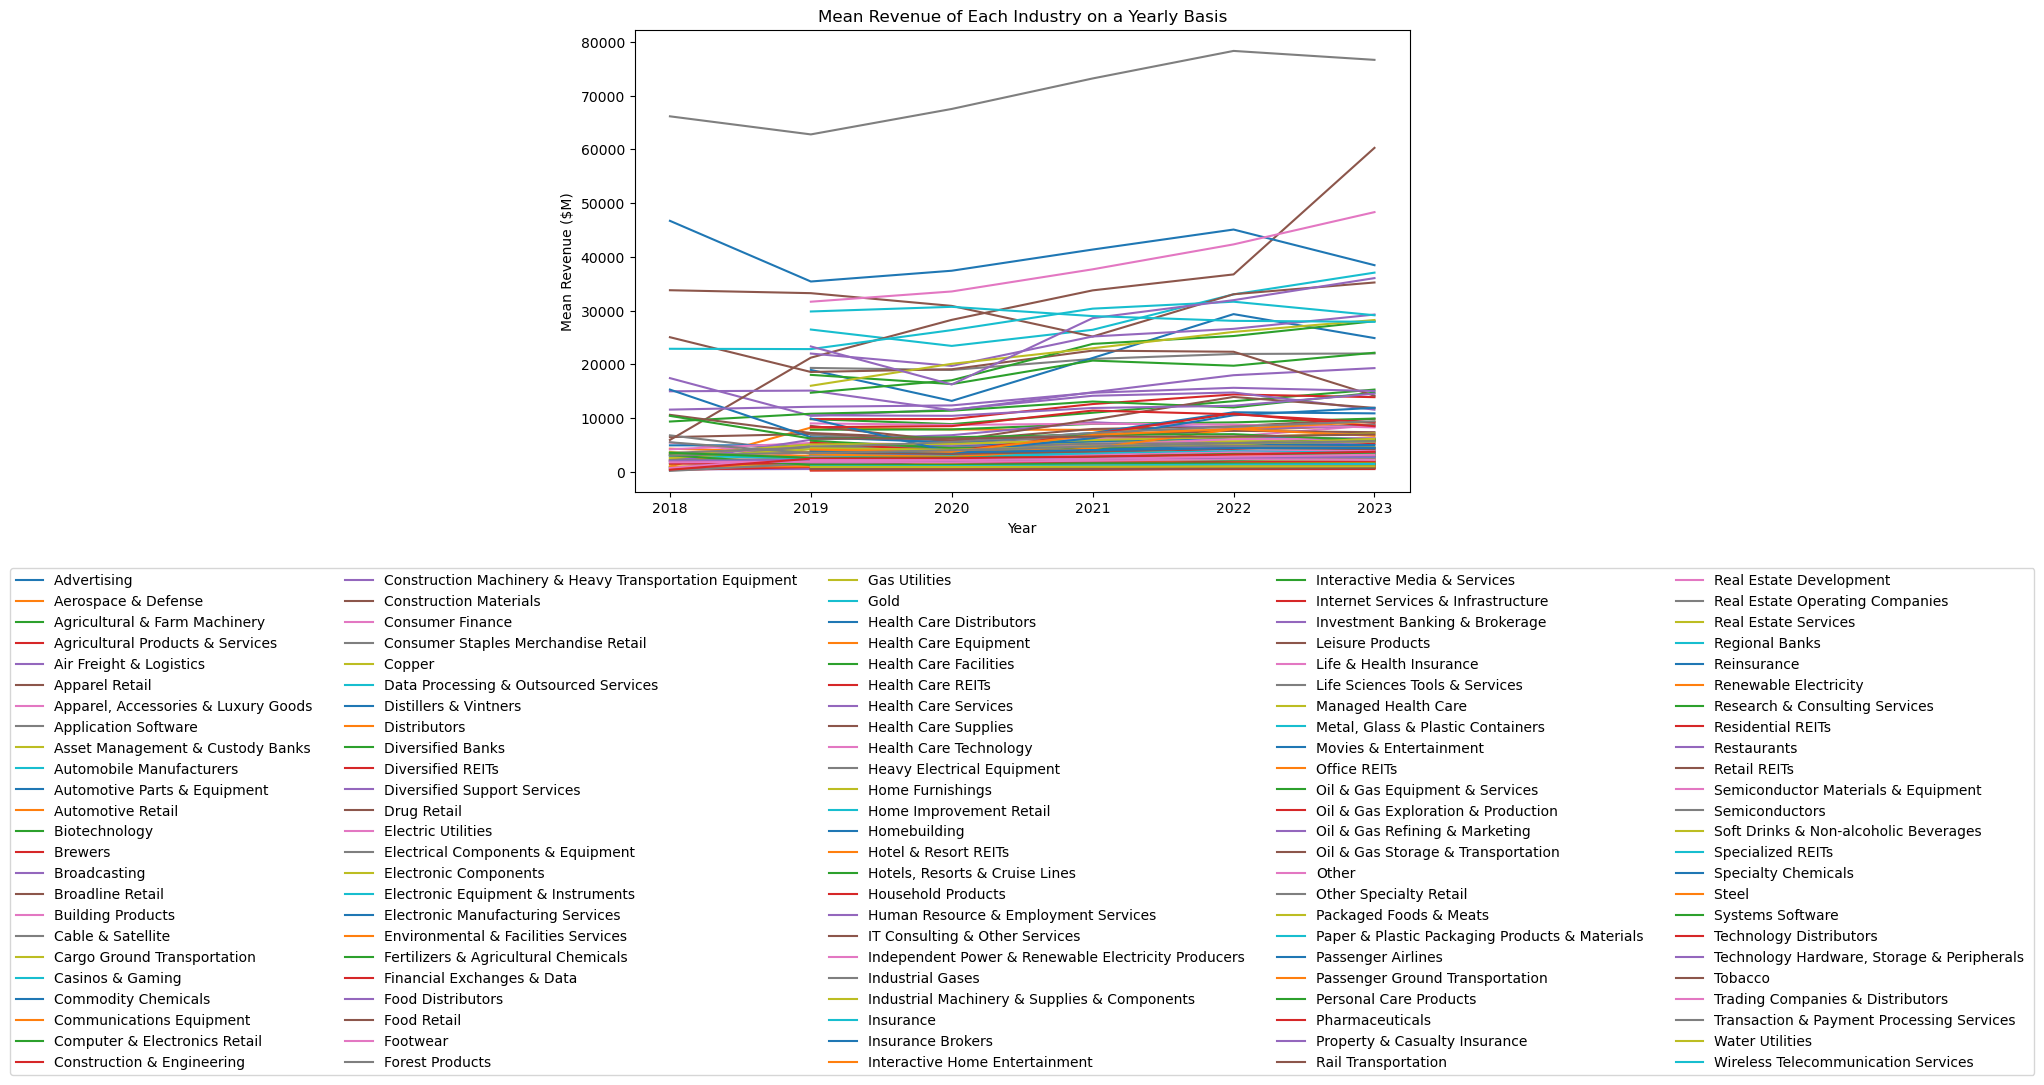

In [93]:
# Extract the year from the 'Corresponding Date' column
# Calculate the mean revenue of each industry on a yearly basis
mean_revenue = df.groupby(['Primary Industry', 'Year'])['Revenue ($M)'].mean().reset_index()

# Pivot the data to have industries as columns, years as index and mean revenue as values
pivot_data = mean_revenue.pivot(index='Year', columns='Primary Industry', values='Revenue ($M)')

# Plot the data
pivot_data.plot(kind='line', figsize=(10, 6))

plt.title('Mean Revenue of Each Industry on a Yearly Basis')
plt.ylabel('Mean Revenue ($M)')

# Move the legend below the plot
plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=5)

plt.show()

In [104]:
#Correlation matrix of the float64 columns

# Getting the float64 columns
float64_columns = df.select_dtypes(include=['float64'])

# Calculate the correlation matrix
corr_matrix = float64_columns.corr()
print(corr_matrix)


                              Revenue ($M)  Gross Profit Margin  EBITDA ($M)  \
Revenue ($M)                      1.000000            -0.178865     0.627693   
Gross Profit Margin              -0.178865             1.000000     0.120569   
EBITDA ($M)                       0.627693             0.120569     1.000000   
EBITDA Margin                    -0.111115             0.602052     0.203631   
Net Income ($M)                   0.489672             0.089127     0.850138   
Normalized Net Income ($M)        0.542843             0.085782     0.913612   
Normalized Net Income Margin     -0.052181             0.414572     0.169718   
Normalized Basic EPS              0.108833             0.054258     0.554316   
Diluted EPS incl extra items      0.110747             0.053127     0.552229   
Debt to Equity                    0.008977             0.004437     0.001507   
Current Ratio                    -0.062897             0.116973    -0.024726   
EBITDA/Int Expense               -0.0160

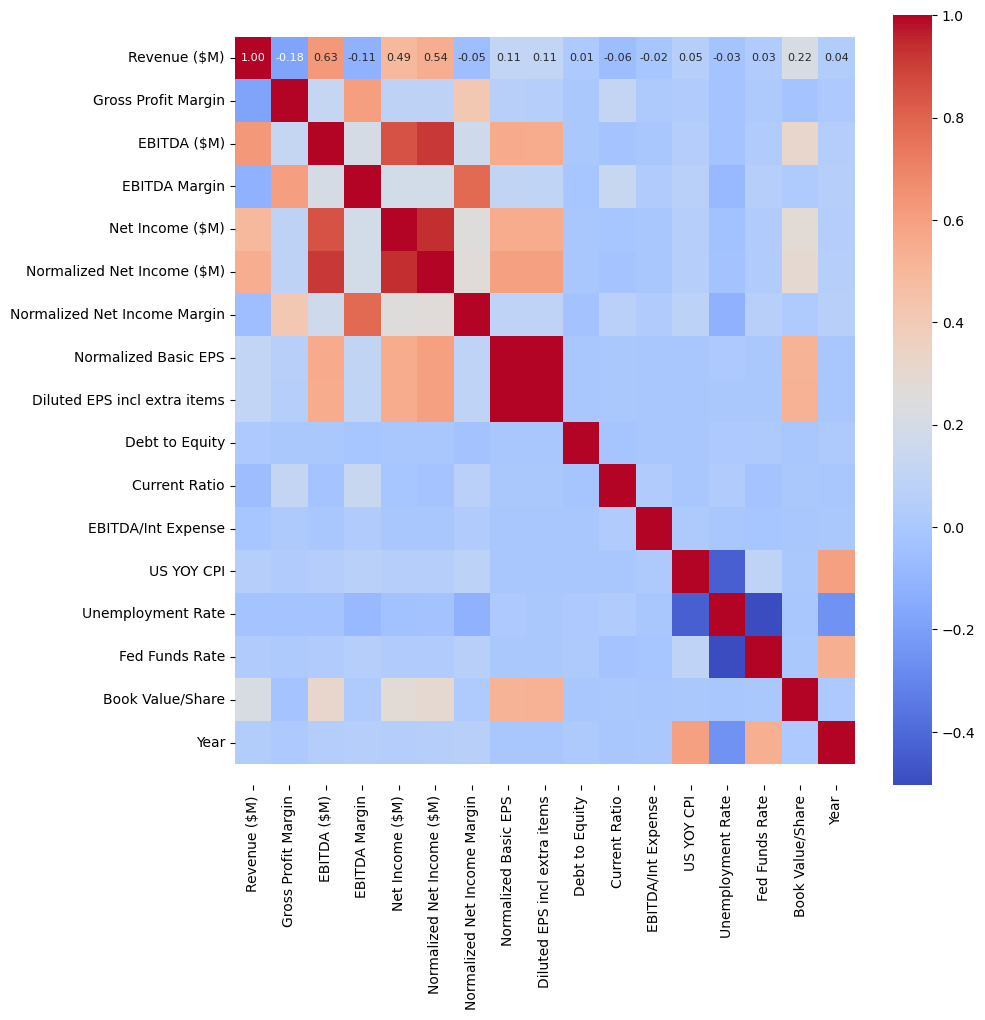

In [103]:
#Making a cooler heat map

# Create a figure with a specified size
plt.figure(figsize=(10, 10))

# Create a heatmap with smaller annotations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})

# Adjust the margins
b, t = plt.ylim()  # Get the current bottom and top limits
b += 0.5  # Add 0.5 to the bottom
t -= 0.5  # Subtract 0.5 from the top
plt.ylim(b, t)  # Update the ylim(bottom, top) values

plt.show()